In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re

# Addressing duplicate data file concern
There seem to be duplicate data files in the repository with only difference being the numbers in the datafiles names. We need to verify if these files are indeed duplicates.

In [6]:
def compare_data_files(file1, file2):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    return df1.equals(df2)

# Example usage:
result = compare_data_files(r'C:\Users\hamza\Documents\Github\data3001-data-cyber-3\data\sony_bravia (1).csv', r'C:\Users\hamza\Documents\Github\data3001-data-cyber-3\data\sony_bravia (2).csv')
print("Data files are the same:", result)


Data files are the same: False


From above result it is evident that the data files are indeed different and thus not duplicates, so we have to consider each and every file in our analysis

# Adding all files into 1 DataFrame

In [7]:
# path to data directory 
data_path = r'C:\Users\hamza\Documents\Github\data3001-data-cyber-3\data'

# get a list of all csv files in the directory
all_files = glob.glob(os.path.join(data_path, '*.csv'))

# initialise empty list to hold the dataframes
df_list = []

# loop over all the files and read them
for filename in all_files:
    
    # Read the csv file into the DataFrame
    df = pd.read_csv(filename, low_memory=False)
    
    # Extract the device name from the filename
    device_name = os.path.splitext(os.path.basename(filename))[0]
    
    # Use regular expression to remove numbers and parentheses at the end of the device name
    device_name = re.sub(r'(\(\d+\))$', '', device_name).strip()
    
    # Add a column for the device name into the DataFrame
    df['deviceName'] = device_name
    
    # Append the DataFrame to the list
    df_list.append(df)
    
# Concatenate all DataFrames into 1
combined_df = pd.concat(df_list, ignore_index=True)

# Combined data set information
The result below confirms that our combined dataset consists of 11 million rows as identified in the ReadMe file.

In [8]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11736771 entries, 0 to 11736770
Data columns (total 45 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   deviceName                                object 
 1   deviceClass                               object 
 2   IoTMacAddress                             object 
 3   IoTIPAddress                              object 
 4   IoTTransportPort                          float64
 5   serverMacAddress                          object 
 6   serverIPAddress                           object 
 7   serverTransportPort                       float64
 8   serviceType                               object 
 9   protocolIdentifier                        float64
 10  protocolName                              object 
 11  flowStartMillisecondsDate                 object 
 12  flowEndMillisecondsDate                   object 
 13  flowStartMillisecondsTime                 object 
 14  

# Encoding Categorial Variables:

Categorical data musts be converted into numerical data before feeding it into a machine learning model.


In [9]:
# Identify columns with object data type
categorical_cols = combined_df.select_dtypes(include=['object']).columns.tolist()

# Remove target variables from the list
categorical_cols.remove('deviceName')  # Assuming 'deviceName' is your target

# If 'deviceClass' is present and not used as a feature, remove it
if 'deviceClass' in categorical_cols:
    categorical_cols.remove('deviceClass')

print("Categorical columns to encode:", categorical_cols)

Categorical columns to encode: ['IoTMacAddress', 'IoTIPAddress', 'serverMacAddress', 'serverIPAddress', 'serviceType', 'protocolName', 'flowStartMillisecondsDate', 'flowEndMillisecondsDate', 'flowStartMillisecondsTime', 'flowEndMillisecondsTime', 'flowEndReason', 'initialTCPFlags', 'unionTCPFlags', 'reverseInitialTCPFlags']


In [10]:
from sklearn.preprocessing import LabelEncoder

# Convert columns to string type to avoid mixed data type errors
for col in categorical_cols:
    combined_df[col] = combined_df[col].astype(str)

le = LabelEncoder()
for col in categorical_cols:
    combined_df[col] = le.fit_transform(combined_df[col])

# Exploratory Data Analysis EDA

In [11]:
unique_devices = combined_df['deviceName'].nunique()
print('Number of devices:', unique_devices)

Number of devices: 24


In [12]:
device_names = combined_df['deviceName'].unique()
print(device_names)

['amazon_echo_gen2' 'au_network_camera' 'au_wireless_adapter'
 'bitfinder_awair_breathe_easy' 'candy_house_sesami_wi-fi_access_point'
 'google_home_gen1' 'i-o_data_qwatch' 'irobot_roomba' 'jvc_kenwood_cu-hb1'
 'jvc_kenwood_hdtv_ip_camera' 'link_japan_eremote'
 'mouse_computer_room_hub' 'nature_remo' 'panasonic_doorphone'
 'philips_hue_bridge' 'planex_camera_one_shot!' 'planex_smacam_outdoor'
 'planex_smacam_pantilt' 'powerelectric_wi-fi_plug' 'qrio_hub'
 'sony_bravia' 'sony_network_camera' 'sony_smart_speaker'
 'xiaomi_mijia_led']


In [13]:
device_counts = combined_df['deviceName'].value_counts()
print(device_counts)

deviceName
google_home_gen1                         4923787
sony_bravia                              3311243
sony_smart_speaker                       1545117
i-o_data_qwatch                          1341811
amazon_echo_gen2                          367730
bitfinder_awair_breathe_easy               97280
au_wireless_adapter                        41229
au_network_camera                          29504
planex_camera_one_shot!                     9999
powerelectric_wi-fi_plug                    9512
planex_smacam_outdoor                       7850
jvc_kenwood_cu-hb1                          7722
mouse_computer_room_hub                     6308
panasonic_doorphone                         6173
planex_smacam_pantilt                       5687
candy_house_sesami_wi-fi_access_point       5628
philips_hue_bridge                          5382
qrio_hub                                    4679
sony_network_camera                         3138
link_japan_eremote                          1888
nature_re

In [14]:
combined_df.head(100)

,deviceName,deviceClass,IoTMacAddress,IoTIPAddress,IoTTransportPort,serverMacAddress,serverIPAddress,serverTransportPort,serviceType,protocolIdentifier,...,standardDeviationInterarrivalTime,reverseSmallPacketCount,reverseLargePacketCount,reverseNonEmptyPacketCount,reverseFirstNonEmptyPacketSize,reverseMaxPacketSize,reverseDataByteCount,reverseBytesPerPacket,reverseAverageInterarrivalTime,reverseStandardDeviationInterarrivalTime
0,amazon_echo_gen2,Smart speaker,10,446,57457.0,8,1677,443.0,2,6.0,...,478.0,5.0,5.0,12.0,92.0,2127.0,5737.0,478.0,2038.0,2004.0
1,amazon_echo_gen2,Smart speaker,10,446,17310.0,8,827,53.0,0,17.0,...,0.0,1.0,0.0,1.0,57.0,57.0,57.0,57.0,0.0,0.0
2,amazon_echo_gen2,Smart speaker,10,446,8.0,8,827,0.0,3,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,amazon_echo_gen2,Smart speaker,10,446,47080.0,8,6335,80.0,1,6.0,...,90742.0,0.0,3.0,3.0,356.0,419.0,1194.0,398.0,50027.0,101844.0
4,amazon_echo_gen2,Smart speaker,10,446,51118.0,8,827,53.0,0,17.0,...,0.0,0.0,0.0,1.0,111.0,111.0,111.0,111.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,amazon_echo_gen2,Smart speaker,10,446,23720.0,8,827,53.0,0,17.0,...,0.0,0.0,0.0,1.0,111.0,111.0,111.0,111.0,0.0,0.0
96,amazon_echo_gen2,Smart speaker,10,446,42911.0,8,827,53.0,0,17.0,...,0.0,0.0,0.0,1.0,111.0,111.0,111.0,111.0,0.0,0.0
97,amazon_echo_gen2,Smart speaker,10,446,50334.0,8,2431,80.0,1,6.0,...,82505.0,0.0,3.0,3.0,356.0,419.0,1194.0,398.0,50029.0,101799.0
98,amazon_echo_gen2,Smart speaker,10,446,40017.0,8,827,53.0,0,17.0,...,0.0,1.0,0.0,1.0,52.0,52.0,52.0,52.0,0.0,0.0


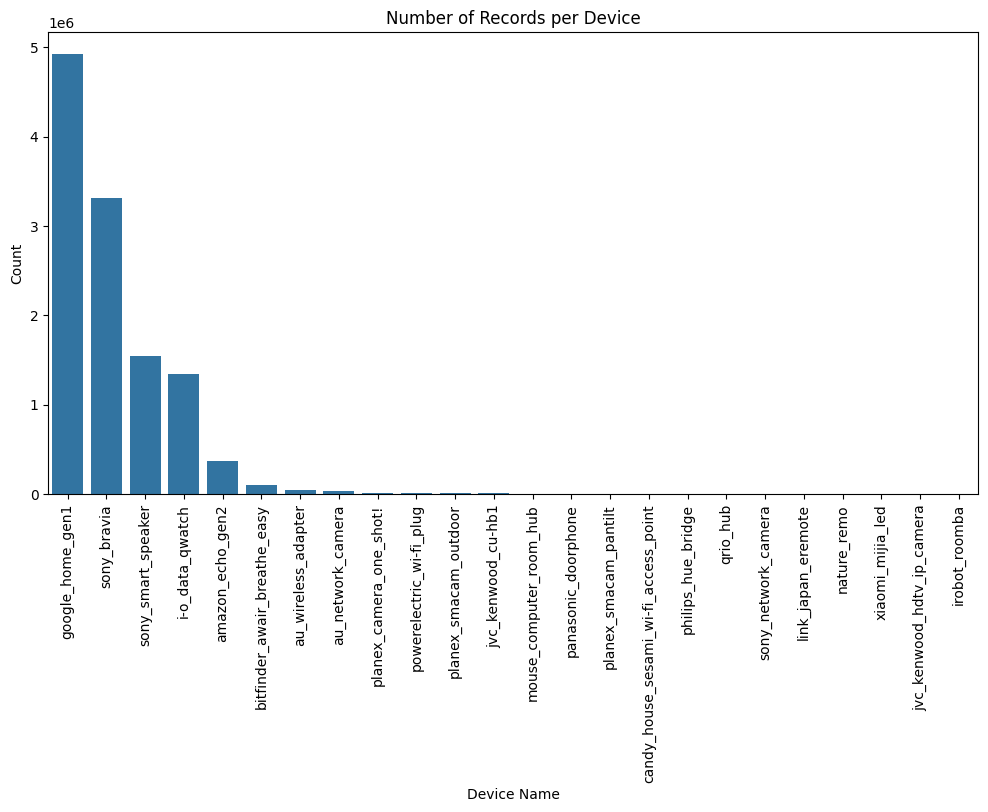

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=device_counts.index, y=device_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Records per Device')
plt.xlabel('Device Name')
plt.ylabel('Count')
plt.show()

# Feature Selection
Remove Mac addresses and IP addresses since they are unique to devices and should not be used for generalisation

In [16]:
# Features to exclude (e.g., unique identifiers)
features_to_exclude = ['IoTMacAddress', 'IoTIPAddress', 'serverMacAddress', 'serverIPAddress']

combined_df = combined_df.drop(features_to_exclude, axis=1, errors='ignore')

### Remove features with low variance
features with little to no variance, i.e., same value across most or all observations do not help the model distinguish between classes and may introduce unnecessary complexity.

In [17]:
from sklearn.feature_selection import VarianceThreshold

# Define the target variable
y = combined_df['deviceName']  # or 'deviceClass' if that's your target

# Define the feature set by dropping the target and any non-feature columns
X = combined_df.drop(['deviceName', 'deviceClass'], axis=1, errors='ignore')

# Store the original feature names
original_features = X.columns.tolist()

# Create a VarianceThreshold object (threshold can be adjusted)
selector = VarianceThreshold(threshold=0.1)  # Remove features with variance less than 0.1

# Fit the selector to X
selector.fit(X)

# Get the indices of features that are kept
features_kept = X.columns[selector.get_support(indices=True)]

# Identify the features that were dropped
features_dropped = list(set(original_features) - set(features_kept.tolist()))

# Print the features that were dropped
print("Features dropped due to low variance:")
print(features_dropped)

# Update X to include only the selected features
X = X[features_kept]


Features dropped due to low variance:
['reverseFlowAttributes']


In [18]:
combined_df.head()

,deviceName,deviceClass,IoTTransportPort,serverTransportPort,serviceType,protocolIdentifier,protocolName,flowStartMillisecondsDate,flowEndMillisecondsDate,flowStartMillisecondsTime,...,standardDeviationInterarrivalTime,reverseSmallPacketCount,reverseLargePacketCount,reverseNonEmptyPacketCount,reverseFirstNonEmptyPacketSize,reverseMaxPacketSize,reverseDataByteCount,reverseBytesPerPacket,reverseAverageInterarrivalTime,reverseStandardDeviationInterarrivalTime
0,amazon_echo_gen2,Smart speaker,57457.0,443.0,2,6.0,2,0,0,2859860,...,478.0,5.0,5.0,12.0,92.0,2127.0,5737.0,478.0,2038.0,2004.0
1,amazon_echo_gen2,Smart speaker,17310.0,53.0,0,17.0,3,0,0,2859855,...,0.0,1.0,0.0,1.0,57.0,57.0,57.0,57.0,0.0,0.0
2,amazon_echo_gen2,Smart speaker,8.0,0.0,3,1.0,0,0,0,2867439,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,amazon_echo_gen2,Smart speaker,47080.0,80.0,1,6.0,2,0,0,2867451,...,90742.0,0.0,3.0,3.0,356.0,419.0,1194.0,398.0,50027.0,101844.0
4,amazon_echo_gen2,Smart speaker,51118.0,53.0,0,17.0,3,0,0,2867443,...,0.0,0.0,0.0,1.0,111.0,111.0,111.0,111.0,0.0,0.0


## Correlation Matrix

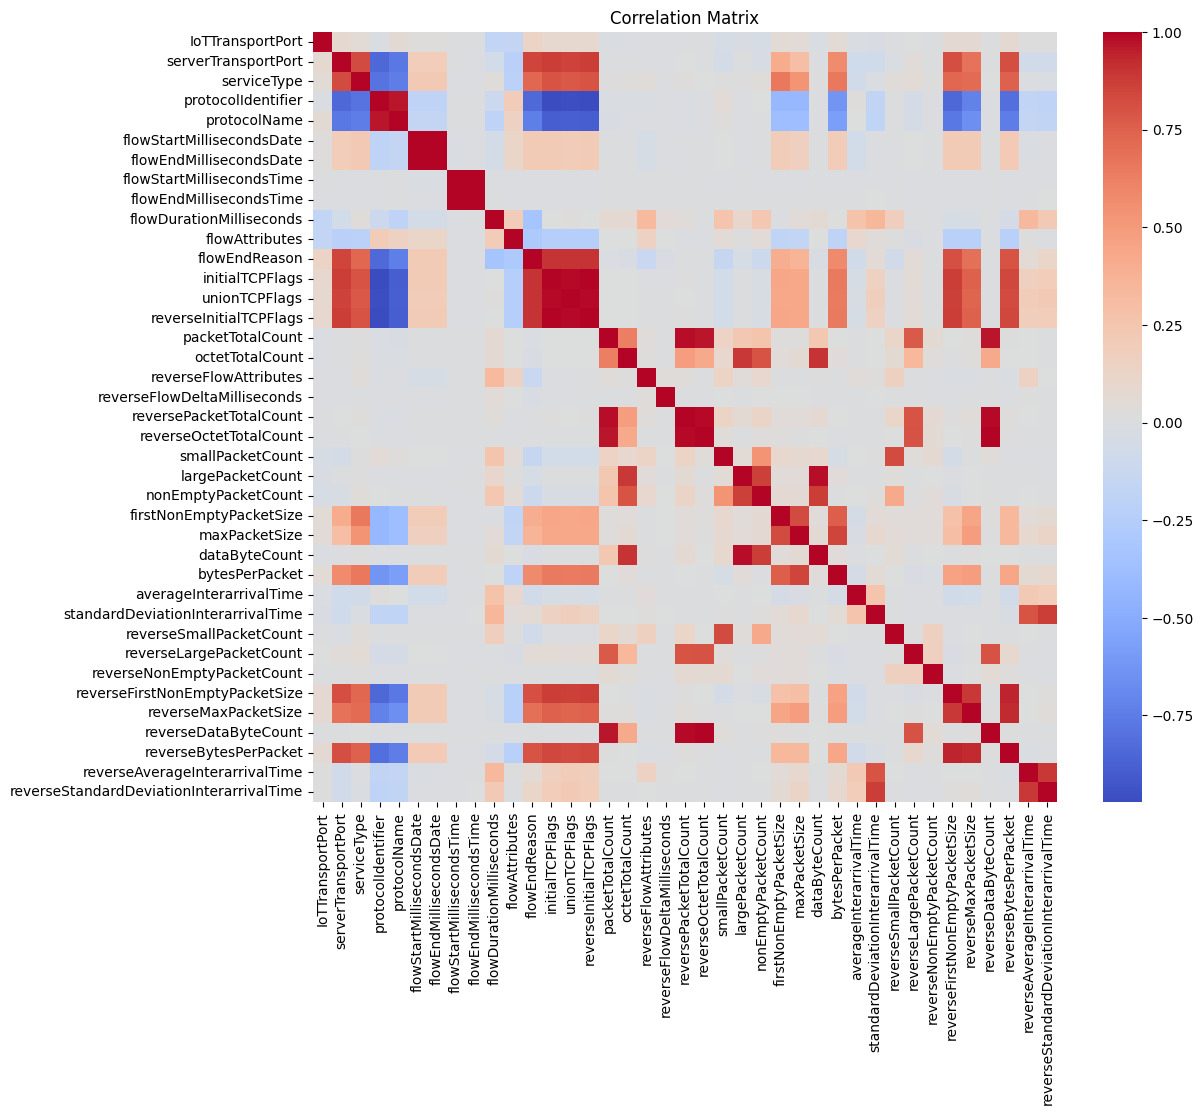

In [19]:
# Select only the numeric columns
numeric_cols = combined_df.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric data
corr_matrix = numeric_cols.corr()

# Now, plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Splitting the Data into training and test data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Training the model

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model with class weights to handle class imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Test the model
y_pred = rf_model.predict(X_test)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Accuracy: 0.99
Classification Report:
                                       precision    recall  f1-score   support

                     amazon_echo_gen2       1.00      1.00      1.00     73546
                    au_network_camera       0.99      0.97      0.98      5901
                  au_wireless_adapter       1.00      0.99      0.99      8246
         bitfinder_awair_breathe_easy       0.99      1.00      0.99     19456
candy_house_sesami_wi-fi_access_point       0.99      0.98      0.99      1126
                     google_home_gen1       0.99      0.99      0.99    984758
                      i-o_data_qwatch       1.00      1.00      1.00    268362
                        irobot_roomba       0.66      0.62      0.64       141
                   jvc_kenwood_cu-hb1       1.00      1.00      1.00      1544
           jvc_kenwood_hdtv_ip_camera       0.91      0.92      0.91       229
                   link_japan_eremote       0.85      0.81      0.83       378
             

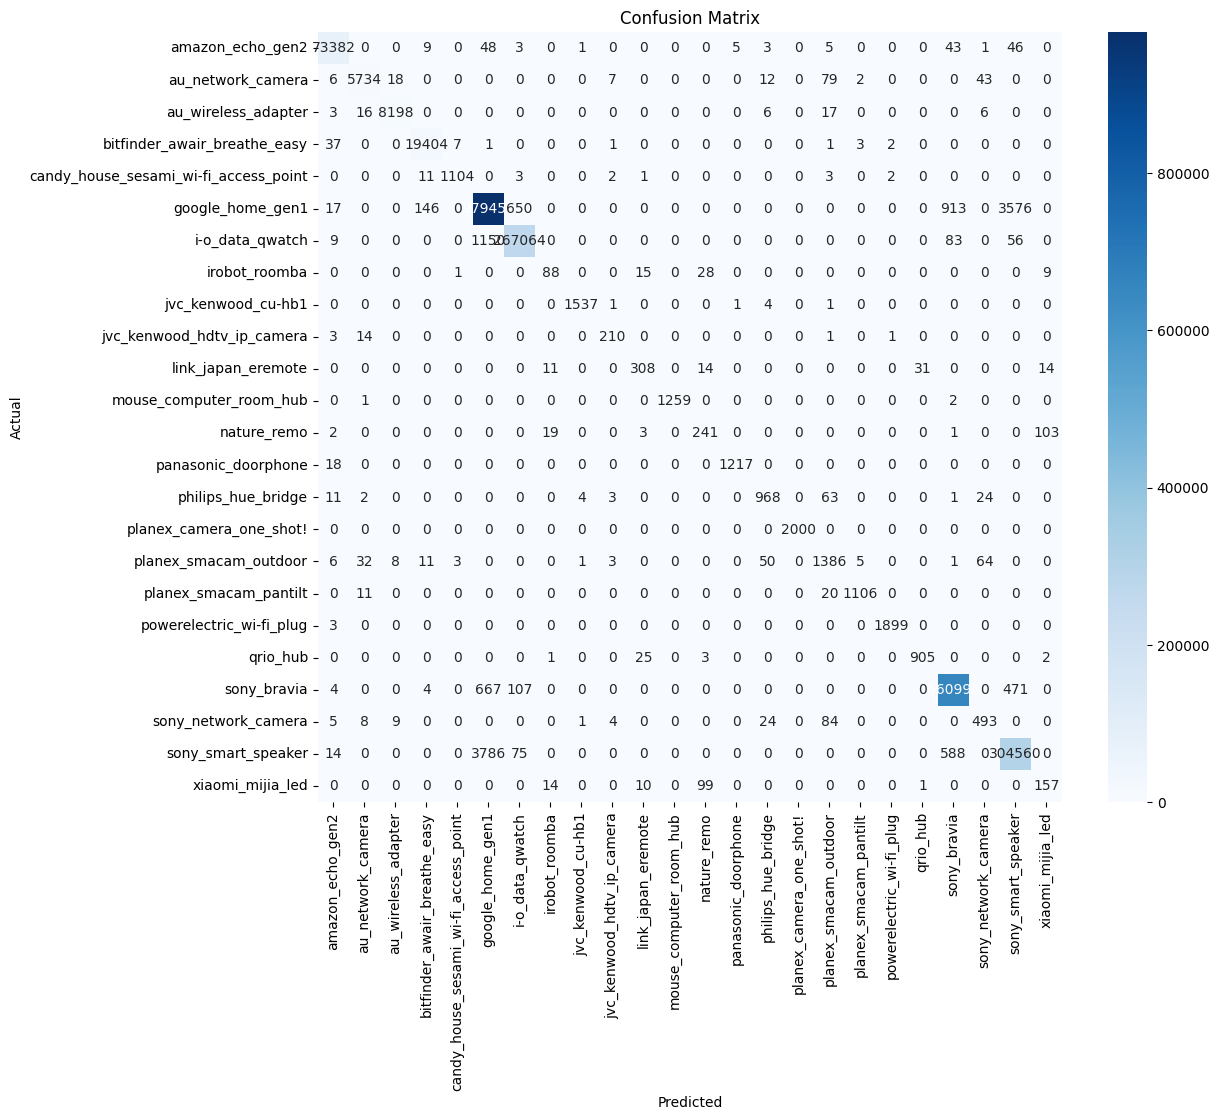

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance
Identify which features contribute most to the models predictions.

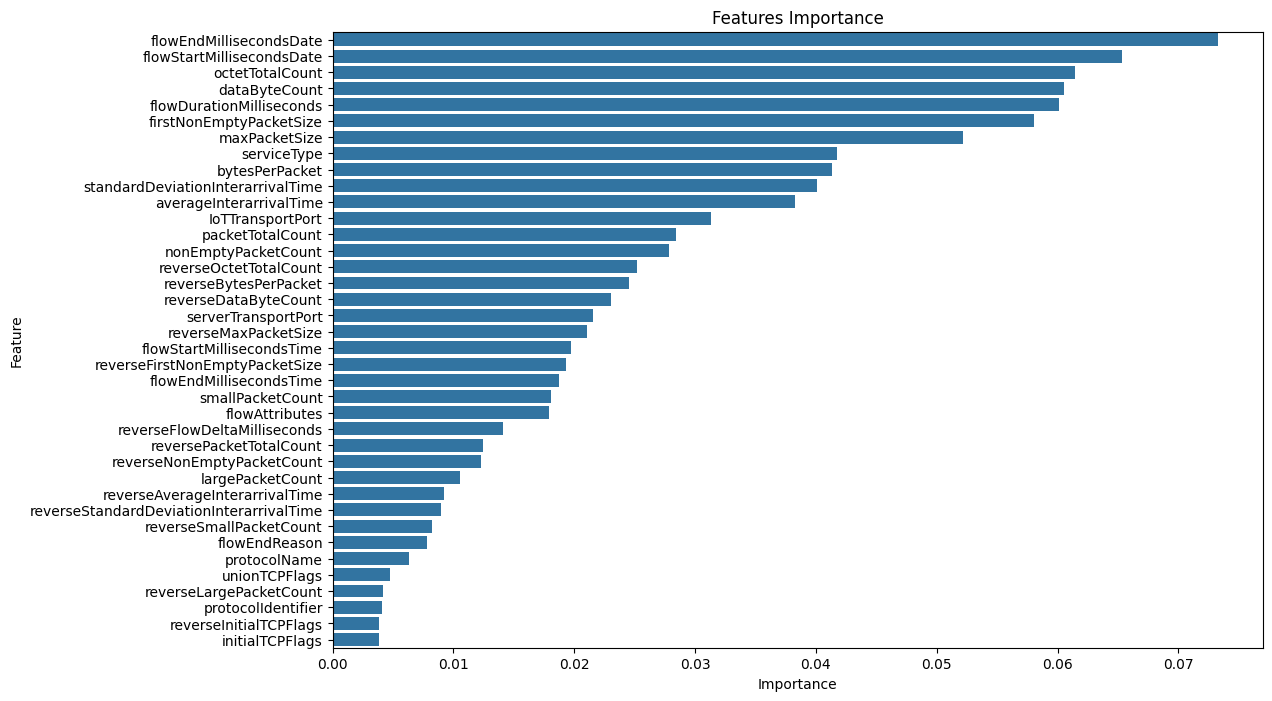

In [31]:
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualise the top features
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Features Importance')
plt.show()

## Save trained model

In [37]:
import joblib

# Save the model
joblib.dump(rf_model, 'rf_model.pkl')

# Load the model
rf_model = joblib.load('rf_model.pkl')

In [1]:
print('testing github')

testing github


In [1]:
print('testing github from my mac')

testing github from my mac
